# Proyecto Ciencia de Datos - Tecnologías Emergentes

Análisis de registros de uso y demanda del agua - Corantioquia

# Etapa 1 - Carga y Exploración


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, LabelEncoder

# Cargar el archivo CSV (ajusta el nombre si es necesario)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

# 1. Cargar datos reales
# df = pd.read_csv("Registro_de__uso_y_demanda_del_agua_Corantioquia_20250602.csv")
df.head()


Saving Registro_de__uso_y_demanda_del_agua_Corantioquia_20250602.csv to Registro_de__uso_y_demanda_del_agua_Corantioquia_20250602 (3).csv


,id,Tipo_captacion,Nombre_fuente,Nombre_cuenca,Cota,Permanentes,Flotantes,Domestico,Agricola,Pecuario,Piscicola,Caudal_total
0,117353.0,Superficial,19851 - La Florida,Q. San Mateo,1420.0,3.0,2.0,0.007300,0.0153,0.000000,0.0,0.022600
1,125944.0,Superficial,10549 - Salinas,Q. PIEDRAS BLANCAS,1966.0,1.0,2.0,0.003877,0.0000,0.000197,0.0,0.004074
2,122869.0,Superficial,21807 - Sin Nombre,Q. Guaracu,1231.0,4.0,9.0,0.016481,0.0000,0.007824,0.0,0.024305
3,118738.0,Superficial,12059 - Nacimiento Las Peñas,Directos R. Cauca (md) entre R. Tonusco y Q. L...,1451.0,4.0,4.0,0.010400,0.0000,0.011435,0.0,0.021835
4,117470.0,Superficial,2867 - Borbollon,Q. LA IGUANA,2600.0,3.0,5.0,0.010706,0.0050,0.000745,0.0,0.016451


In [ ]:
# Estadísticas descriptivas de variables numéricas
descriptive_stats = df[['Domestico', 'Agricola', 'Pecuario', 'Piscicola', 'Caudal_total', 'Cota']].describe().transpose()
display(descriptive_stats)

# Interpretación en texto
from IPython.display import Markdown

texto_descriptivo = """
### Análisis Estadístico Descriptivo

Se realizó un análisis descriptivo de las variables numéricas relacionadas con el uso del agua.
- Los **promedios son bajos** en todos los usos, lo que indica que la mayoría de las concesiones autorizadas son pequeñas.
- Los **valores máximos son muy altos** en comparación con el percentil 75, lo que sugiere la existencia de **outliers**.
- Por ejemplo, el **uso agrícola** alcanza un máximo de 3.96, mientras que su percentil 75 es apenas 0.01.
- La variable `Caudal_total` también muestra esta tendencia, con una media de 0.039 L/s pero un máximo cercano a 4 L/s.

Este análisis justifica el tratamiento posterior de valores extremos en la etapa de limpieza de datos.
"""

Markdown(texto_descriptivo)


,count,mean,std,min,25%,50%,75%,max
Domestico,5554.0,0.009774,0.036992,0.00,0.00590,0.0089,0.012583,2.633102
Agricola,5554.0,0.022178,0.163459,0.00,0.00000,0.0000,0.010000,9.300000
Pecuario,5554.0,0.001994,0.005201,0.00,0.00000,0.0000,0.002384,0.171900
Piscicola,5554.0,0.006524,0.068998,0.00,0.00000,0.0000,0.000000,2.714100
Caudal_total,5554.0,0.041070,0.181922,0.00,0.00889,0.0147,0.026826,9.302448
Cota,5554.0,1795.613180,502.598857,1.27,1515.00000,1820.0000,2144.500000,2885.000000



### Análisis Estadístico Descriptivo

Se realizó un análisis descriptivo de las variables numéricas relacionadas con el uso del agua.
- Los **promedios son bajos** en todos los usos, lo que indica que la mayoría de las concesiones autorizadas son pequeñas.
- Los **valores máximos son muy altos** en comparación con el percentil 75, lo que sugiere la existencia de **outliers**.
- Por ejemplo, el **uso agrícola** alcanza un máximo de 3.96, mientras que su percentil 75 es apenas 0.01.
- La variable `Caudal_total` también muestra esta tendencia, con una media de 0.039 L/s pero un máximo cercano a 4 L/s.

Este análisis justifica el tratamiento posterior de valores extremos en la etapa de limpieza de datos.


In [ ]:
# 4. Conteo de valores nulos por columna
print("\n=== Valores nulos por columna ===")
print(df.isnull().sum().sort_values(ascending=False))

# 5. Conteo de filas duplicadas por 'id'
duplicados_id = df.duplicated(subset=["id"]).sum()
print(f"\n=== Filas duplicadas (misma 'id') ===\n{duplicados_id} registros duplicados")

# 6. Frecuencia de 'Tipo_captacion'
print("\n=== Frecuencia de 'Tipo_captacion' ===")
print(df["Tipo_captacion"].value_counts())

# 7. Top 10 de 'Nombre_cuenca'
print("\n=== Top 10 'Nombre_cuenca' ===")
print(df["Nombre_cuenca"].value_counts().head(10))


=== Valores nulos por columna ===
Nombre_cuenca     25
id                 0
Tipo_captacion     0
Nombre_fuente      0
Cota               0
Permanentes        0
Flotantes          0
Domestico          0
Agricola           0
Pecuario           0
Piscicola          0
Caudal_total       0
dtype: int64

=== Filas duplicadas (misma 'id') ===
264 registros duplicados

=== Frecuencia de 'Tipo_captacion' ===
Tipo_captacion
Superficial    5552
No definido       2
Name: count, dtype: int64

=== Top 10 'Nombre_cuenca' ===
Nombre_cuenca
R. San Juan                                           280
R. Chico                                              229
Q. DOÑA MARIA                                         228
Q. EL SALADO                                          151
Q. LA IGUANA                                          144
R. Grande Tramo 4                                     134
R. Aurra                                              117
DIRECTOS RI. ABURRA  (INTERCUENCA 2)                   97
R. Nu

### Análisis Estadístico Descriptivo

Se realizó un análisis descriptivo de las variables numéricas relacionadas con el uso del agua.  
- Los **promedios son bajos** en todos los usos, lo que indica que la mayoría de las concesiones autorizadas son pequeñas.  
- Los **valores máximos son muy altos** en comparación con el percentil 75, lo que sugiere la existencia de **outliers**.  
- Por ejemplo, el **uso agrícola** alcanza un máximo de 3.96, mientras que su percentil 75 es apenas 0.01.  
- La variable `Caudal_total` también muestra esta tendencia, con una media de 0.039 L/s pero un máximo cercano a 4 L/s.

Este análisis justifica el tratamiento posterior de valores extremos en la etapa de limpieza de datos.

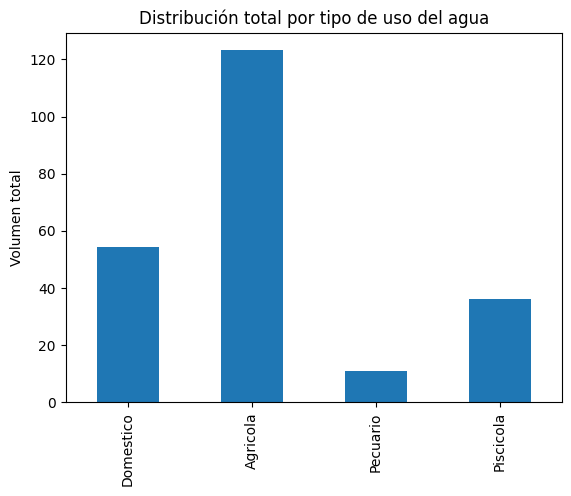

In [ ]:

# Distribución por tipo de uso
uso_totales = df[['Domestico', 'Agricola', 'Pecuario', 'Piscicola']].sum()
uso_totales.plot(kind='bar', title='Distribución total por tipo de uso del agua')
plt.ylabel('Volumen total'); plt.show()

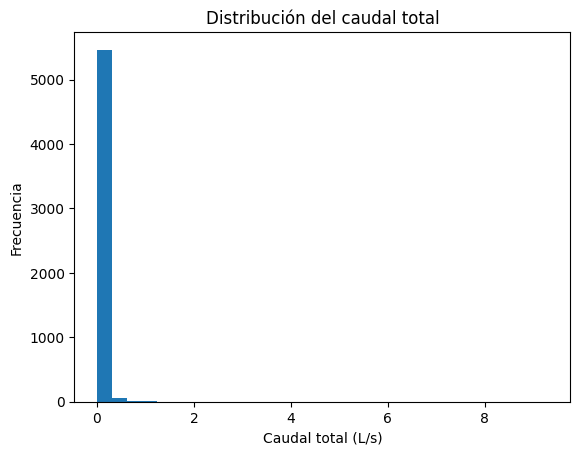

In [ ]:
# Histograma del caudal total
df['Caudal_total'].dropna().plot(kind='hist', bins=30, title='Distribución del caudal total')
plt.xlabel('Caudal total (L/s)'); plt.ylabel('Frecuencia'); plt.show()

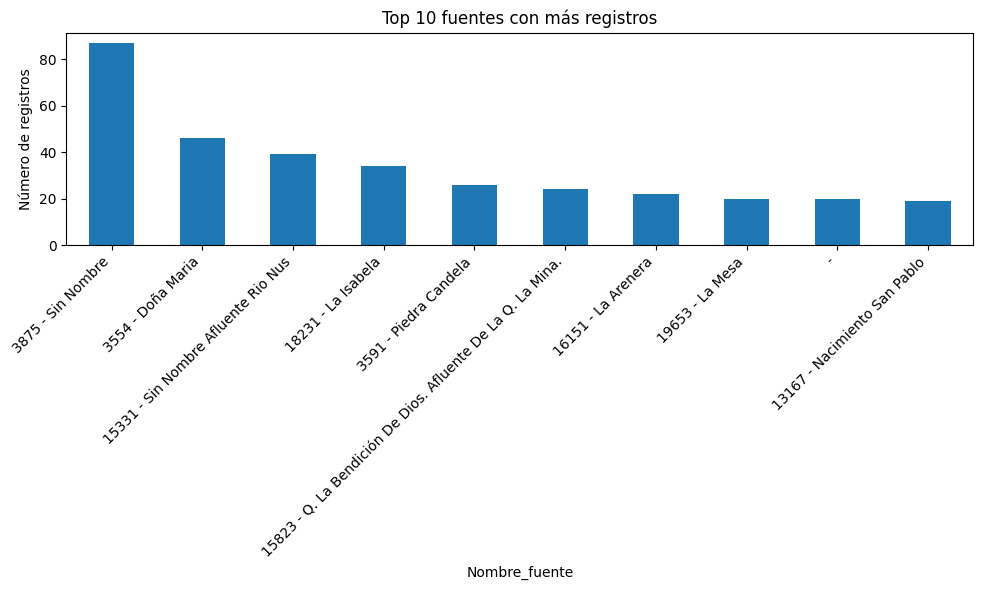

In [ ]:
# Fuentes con más registros
plt.figure(figsize=(10, 6))  # Aumentamos el tamaño de la figura
df['Nombre_fuente'].value_counts().head(10).plot(kind='bar', title='Top 10 fuentes con más registros')
plt.ylabel('Número de registros')
plt.xticks(rotation=45, ha='right')  # Rotamos y alineamos a la derecha para mejor visibilidad
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()


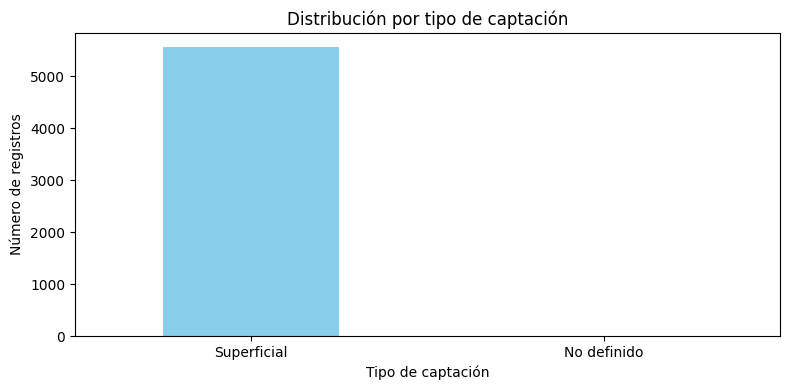

In [ ]:
# DISTRIBUCIÓN DE TIPO DE CAPTACIÓN
plt.figure(figsize=(8, 4))
df['Tipo_captacion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por tipo de captación')
plt.xlabel('Tipo de captación')
plt.ylabel('Número de registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

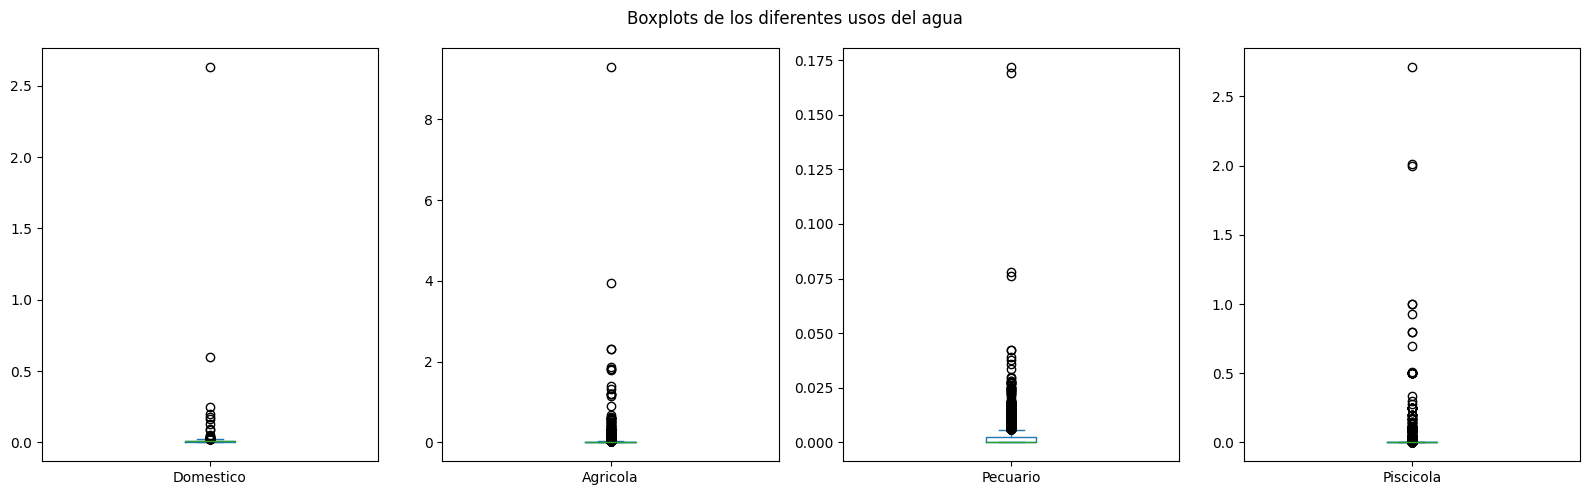

In [ ]:
# BOXPLOTS PARA CADA USO
usos = ['Domestico', 'Agricola', 'Pecuario', 'Piscicola']
plt.figure(figsize=(10, 6))
df[usos].plot(kind='box', subplots=True, layout=(1, 4), figsize=(16, 5), sharey=False)
plt.suptitle('Boxplots de los diferentes usos del agua')
plt.tight_layout()
plt.show()

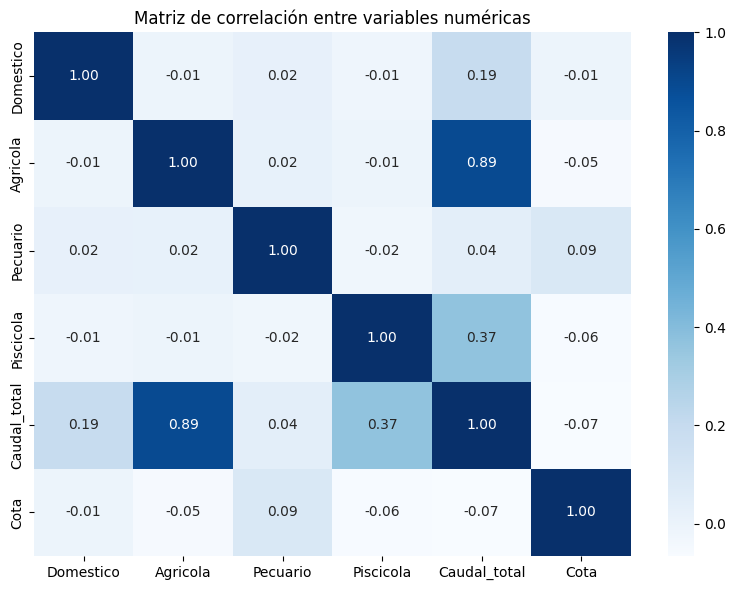

In [ ]:
# MAPA DE CALOR DE CORRELACIÓN
import seaborn as sns

# Seleccionar solo variables numéricas
numeric_cols = df[usos + ['Caudal_total', 'Cota']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

# Etapa 2 - Limpieza de datos

In [ ]:
# 1. Revisar cuántos valores distintos tiene cada columna
nunique_counts = df_clean.nunique()
print("=== Número de valores únicos por columna ===")
print(nunique_counts)

# 2. Identificar columnas con un único valor en todas las filas
const_cols = nunique_counts[nunique_counts == 1].index.tolist()
print("\nColumnas con valor constante (único):", const_cols)

# 3. Identificar columnas cuyos valores sean todos distintos (número de filas = número de valores únicos)
total_rows = df_clean.shape[0]
unique_id_cols = nunique_counts[nunique_counts == total_rows].index.tolist()
print("Columnas con todos los valores distintos:", unique_id_cols)

# 4. Eliminar las columnas constantes y las de identificador único
cols_to_drop = const_cols + unique_id_cols
df_clean = df_clean.drop(columns=cols_to_drop)
print("\nColumnas eliminadas:", cols_to_drop)
print("Nueva forma del DataFrame:", df_clean.shape)



=== Número de valores únicos por columna ===
id                5290
Tipo_captacion       2
Nombre_fuente     2842
Nombre_cuenca      316
Cota              1532
Permanentes         23
Flotantes           33
Domestico          577
Agricola           530
Pecuario           460
Piscicola           89
Caudal_total      2311
dtype: int64

Columnas con valor constante (único): []
Columnas con todos los valores distintos: []

Columnas eliminadas: []
Nueva forma del DataFrame: (5554, 12)


## Reconocimiento y tratamiento de valores faltantes (NaN)

In [ ]:
# Cell 4: Verificar valores nulos en df_reduced antes de imputar
print("\n=== Valores nulos en df_reduced antes de imputar ===")
print(df_reduced.isnull().sum())


=== Valores nulos en df_reduced antes de imputar ===
id                0
Tipo_captacion    0
Nombre_fuente     0
Nombre_cuenca     0
Cota              0
Permanentes       0
Flotantes         0
Domestico         0
Agricola          0
Pecuario          0
Piscicola         0
Caudal_total      0
dtype: int64


In [ ]:
# Cell 5: Imputar los NaN en "Nombre_cuenca" con la etiqueta "Sin información"
df_reduced["Nombre_cuenca"] = df_reduced["Nombre_cuenca"].fillna("Sin información")

print("\nRecuento de valores nulos tras imputar Nombre_cuenca:")
print(df_reduced.isnull().sum())


Recuento de valores nulos tras imputar Nombre_cuenca:
id                0
Tipo_captacion    0
Nombre_fuente     0
Nombre_cuenca     0
Cota              0
Permanentes       0
Flotantes         0
Domestico         0
Agricola          0
Pecuario          0
Piscicola         0
Caudal_total      0
dtype: int64


In [ ]:
df_clean.isnull().sum()


,0
id,0
Tipo_captacion,0
Nombre_fuente,0
Nombre_cuenca,0
Cota,0
Permanentes,0
Flotantes,0
Domestico,0
Agricola,0
Pecuario,0


## Reconocimiento y tratamiento de valores atípicos o inconsistentes

En este caso se realizó un tratamiento correspondiente de outliers o valores atípicos, además se revisaron las posibles inconsistencias presentes en el conjunto de datos, específicamente:

* Valores negativos: No se encontraron valores negativos
* Inconsistencias en Caudal_total: Se verificó que realmente es la suma de las otras fuentes.

In [ ]:
# Eliminar outliers con método IQR
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[df[column] <= Q3 + 1.5 * IQR]

columns_to_filter = ['Domestico', 'Agricola', 'Pecuario', 'Piscicola', 'Caudal_total']
df_clean = df.copy()
for col in columns_to_filter:
    df_clean = filter_outliers(df_clean, col)

df_clean.shape


(3484, 12)

In [ ]:
# Posibles valores negativos
(df_clean[columns_to_filter] < 0).sum()

,0
Domestico,0
Agricola,0
Pecuario,0
Piscicola,0
Caudal_total,0


In [ ]:
# Posibles inconsistencias en Caudal_total

# Revisar si Caudal_total realmente es la suma de las otras fuentes
df_clean["Suma_fuentes"] = df_clean["Domestico"] + df_clean["Agricola"] + df_clean["Pecuario"] + df_clean["Piscicola"]
inconsistencias = (df_clean["Caudal_total"] < df_clean["Suma_fuentes"] - 0.001)
inconsistencias.sum()


np.int64(0)

## Reconocimiento y tratamiento de atributos redundantes

Anteriormente se confirmó que Caudal_total realmente es la suma de las otras fuentes, entonces se elimina esa columna y la auxiliar que se creó en el anterior fragmento (Suma_fuentes).

In [ ]:
df_clean = df_clean.drop(columns=["Caudal_total", "Suma_fuentes"])

# Etapa 3 - Creación de la vista minable

In [ ]:
df_view = df_clean.copy()

# Normalización
scaler = MinMaxScaler()
cols_to_normalize = ['Domestico', 'Agricola', 'Pecuario', 'Piscicola']
df_view[[col + '_norm' for col in cols_to_normalize]] = scaler.fit_transform(df_view[cols_to_normalize])


# Discretización
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_view['Cota_discretizada'] = discretizer.fit_transform(df_view[['Cota']])

# Numerización
label_encoder = LabelEncoder()
df_view['Tipo_captacion_cod'] = label_encoder.fit_transform(df_view['Tipo_captacion'])

df_view.head()

,id,Tipo_captacion,Nombre_fuente,Nombre_cuenca,Cota,Permanentes,Flotantes,Domestico,Agricola,Pecuario,Piscicola,Domestico_norm,Agricola_norm,Pecuario_norm,Piscicola_norm,Cota_discretizada,Tipo_captacion_cod
0,117353.0,Superficial,19851 - La Florida,Q. San Mateo,1420.0,3.0,2.0,0.007300,0.0153,0.000000,0.0,0.327354,0.612,0.000000,0.0,0.0,1
1,125944.0,Superficial,10549 - Salinas,Q. PIEDRAS BLANCAS,1966.0,1.0,2.0,0.003877,0.0000,0.000197,0.0,0.173857,0.000,0.043778,0.0,1.0,1
4,117470.0,Superficial,2867 - Borbollon,Q. LA IGUANA,2600.0,3.0,5.0,0.010706,0.0050,0.000745,0.0,0.480090,0.200,0.165556,0.0,2.0,1
5,105103.0,Superficial,15410 - Sin Nombre Afluente Quebrada La Soledad,R. Porce Parte Media,1205.0,3.0,3.0,0.008900,0.0000,0.000000,0.0,0.399103,0.000,0.000000,0.0,0.0,1
6,113295.0,Superficial,2027 - La Rosa,Q. EL MOLINAL,2077.0,5.0,0.0,0.010127,0.0000,0.000000,0.0,0.454126,0.000,0.000000,0.0,2.0,1


# Etapa 4 – Infografía

In [ ]:
# Configuración general de estilo
sns.set(style="whitegrid", palette="Blues_d")
plt.rcParams["figure.figsize"] = (10, 6)

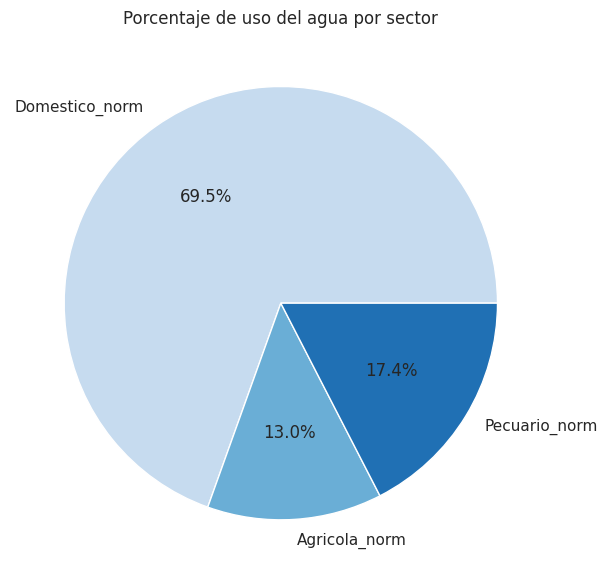

In [ ]:
# ---------------------------
# Porcentaje de uso por sector (omitimos los 0%)
# ---------------------------
total_por_sector = df_view[["Domestico_norm", "Agricola_norm", "Pecuario_norm", "Piscicola_norm"]].sum()

# Filtrar sectores con uso > 0
total_por_sector = total_por_sector[total_por_sector > 0]
porcentaje = total_por_sector / total_por_sector.sum() * 100

# Graficar solo si hay datos válidos
if not porcentaje.empty:
    plt.figure()
    porcentaje.plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("Blues", len(porcentaje)))
    plt.title("Porcentaje de uso del agua por sector")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No hay sectores con uso de agua mayor a 0%.")

<ipython-input-74-9f91a3a4b35d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resumen, x="Rango_cota", y="Cantidad_cuencas", palette="Blues")


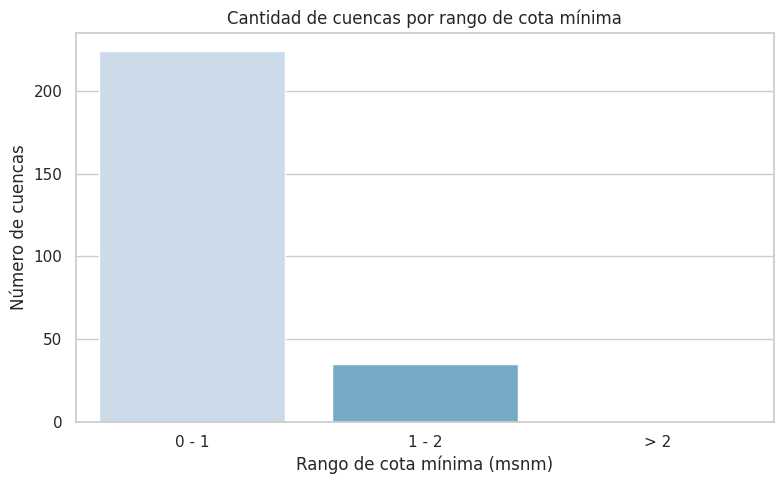

In [ ]:
# ---------------------------
# Resumen: Conteo de cuencas por rango de cota mínima
# ---------------------------

# Agrupar por cuenca y obtener cota mínima
cuencas_min_cota = df_view.groupby("Nombre_cuenca")["Cota_discretizada"].min()

# Clasificar por rangos
count_0_1 = cuencas_min_cota[(cuencas_min_cota >= 0) & (cuencas_min_cota <= 1)].count()
count_1_2 = cuencas_min_cota[(cuencas_min_cota > 1) & (cuencas_min_cota <= 2)].count()
count_mayor_2 = cuencas_min_cota[cuencas_min_cota > 2].count()

# Crear DataFrame para graficar
df_resumen = pd.DataFrame({
    "Rango_cota": ["0 - 1", "1 - 2", "> 2"],
    "Cantidad_cuencas": [count_0_1, count_1_2, count_mayor_2]
})

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(data=df_resumen, x="Rango_cota", y="Cantidad_cuencas", palette="Blues")
plt.title("Cantidad de cuencas por rango de cota mínima")
plt.xlabel("Rango de cota mínima (msnm)")
plt.ylabel("Número de cuencas")
plt.tight_layout()
plt.show()


<ipython-input-66-85ce2f64c4b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuenca_group.values, y=cuenca_group.index, palette="Blues_d")


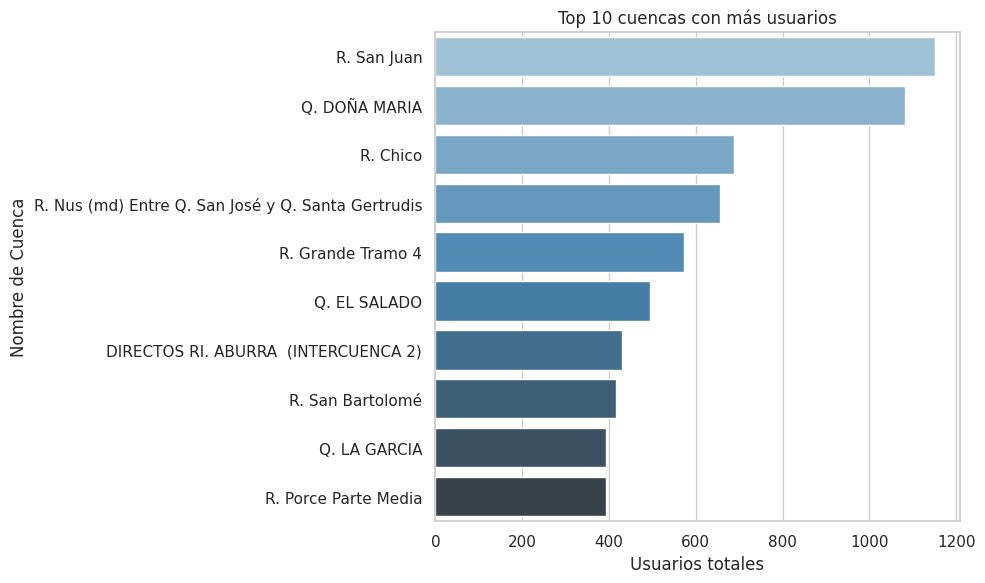

In [ ]:
# ---------------------------
# Usuarios por cuenca (permanentes + flotantes)
# ---------------------------
df_view["Usuarios_totales"] = df_view["Permanentes"] + df_view["Flotantes"]
cuenca_group = df_view.groupby("Nombre_cuenca")["Usuarios_totales"].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=cuenca_group.values, y=cuenca_group.index, palette="Blues_d")
plt.title("Top 10 cuencas con más usuarios")
plt.xlabel("Usuarios totales")
plt.ylabel("Nombre de Cuenca")
plt.tight_layout()
plt.show()

<ipython-input-75-2c2dedcfb3db>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


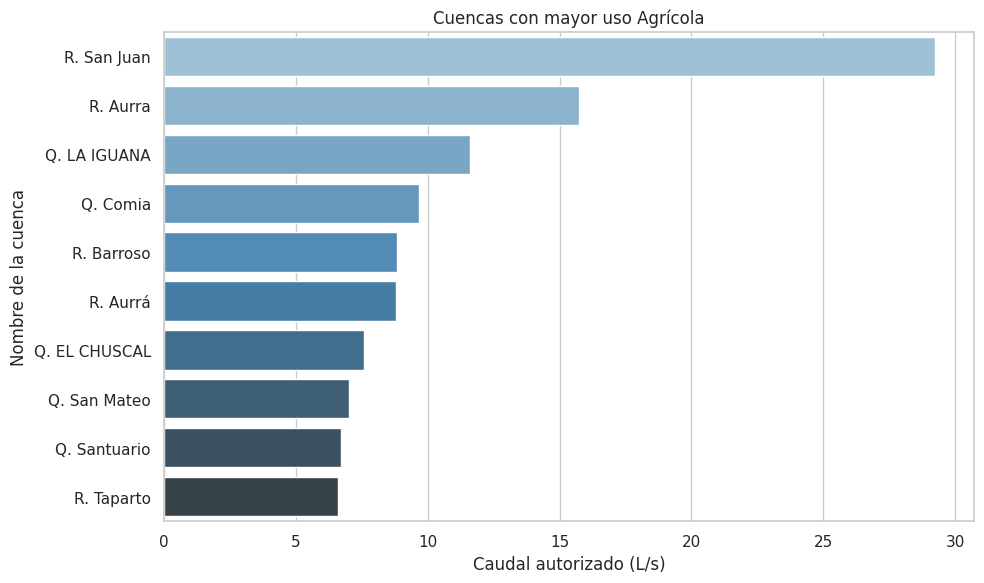

<ipython-input-75-2c2dedcfb3db>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


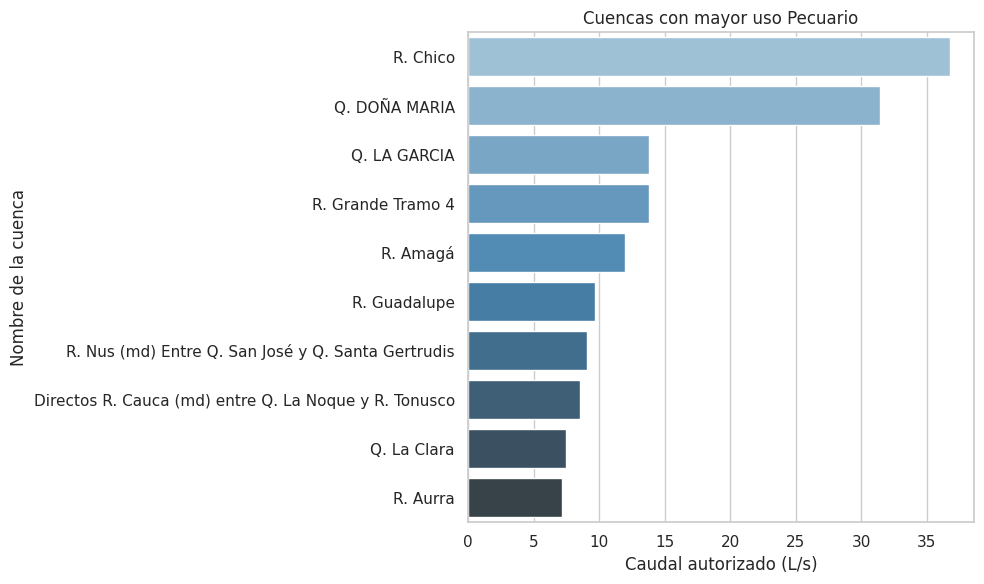

<ipython-input-75-2c2dedcfb3db>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


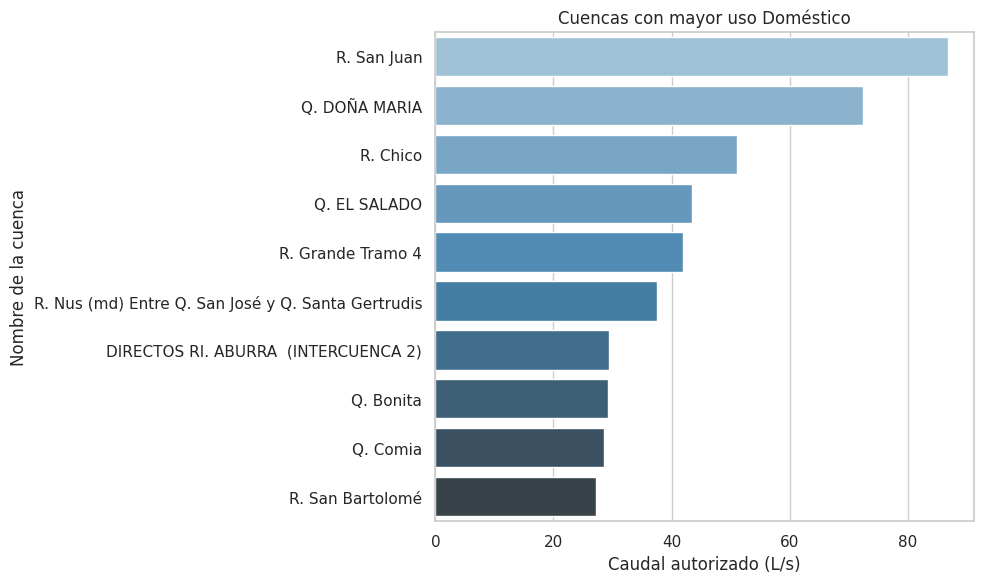

<ipython-input-75-2c2dedcfb3db>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


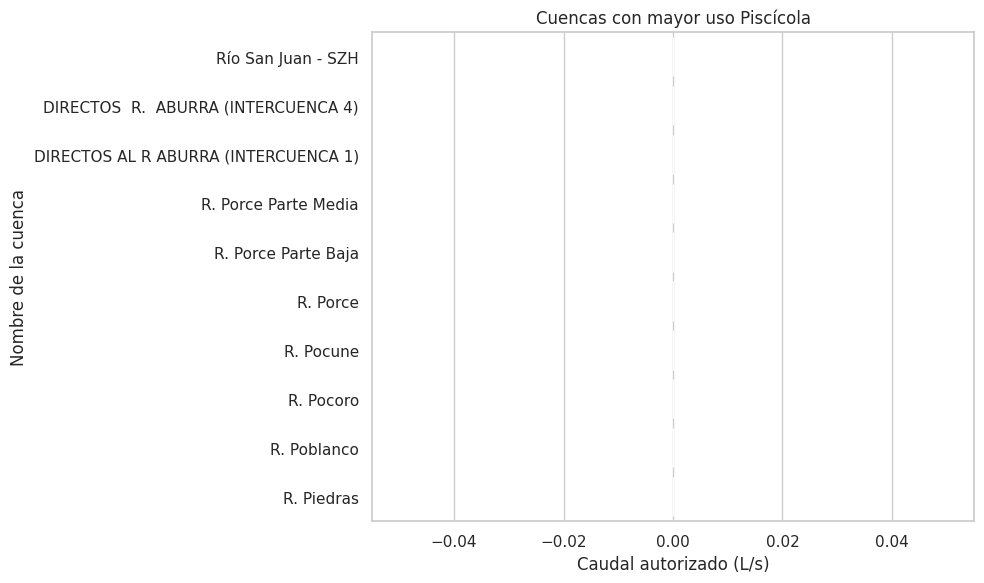

In [ ]:
# ---------------------------
# Cuencas VS. Sectores
# ---------------------------

# Lista de sectores y títulos para los gráficos
sectores = [
    ("Agricola_norm", "Cuencas con mayor uso Agrícola"),
    ("Pecuario_norm", "Cuencas con mayor uso Pecuario"),
    ("Domestico_norm", "Cuencas con mayor uso Doméstico"),
    ("Piscicola_norm", "Cuencas con mayor uso Piscícola")
]

# Generar un gráfico por sector
for sector, titulo in sectores:
    # Agrupar por cuenca y sumar caudal autorizado
    uso_por_cuenca = df_view.groupby("Nombre_cuenca")[sector].sum().sort_values(ascending=False).head(10)

    # Convertir a DataFrame
    df_uso = uso_por_cuenca.reset_index()

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_uso,
        x=sector,
        y="Nombre_cuenca",
        palette="Blues_d"
    )
    plt.title(titulo)
    plt.xlabel("Caudal autorizado (L/s)")
    plt.ylabel("Nombre de la cuenca")
    plt.tight_layout()
    plt.show()